<a href="https://colab.research.google.com/github/Anna72/ML_1_term/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from math import sqrt
from sklearn.metrics.pairwise import euclidean_distances
D = [[1,2], [0,3], [-1,1]]
Y = [[0,-4], [4,-2]]
#complete/single linkage clustering method distance between clusters D and Y
# for complete result is max from clc
# for single result is min from clc
clc = euclidean_distances(D, Y)
clc    

array([[6.08276253, 5.        ],
       [7.        , 6.40312424],
       [5.09901951, 5.83095189]])

In [ ]:
#average linkage clustering method distance between clusters D and Y
alv = sum(sum(clc))/(len(D)*len(Y))
alv

5.902643029361525

In [ ]:
dc = np.mean(D, axis=0)
print(dc)
yc = np.mean(Y, axis=0)
print(yc)
# centroid baised distance between clusters D and Y
cbc = sqrt(pow(dc[0]-yc[0], 2) + pow(dc[1]-yc[1], 2) )
cbc

[0. 2.]
[ 2. -3.]


5.385164807134504

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
X = np.array([[1,2], [0,3], [-1,1], [0,-4], [4,-2]])
clustering = AgglomerativeClustering(linkage='single',n_clusters=2).fit(X)
clustering



AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=2)

In [ ]:
AgglomerativeClustering()
clustering.labels_
# fourth step

array([1, 1, 1, 0, 0])

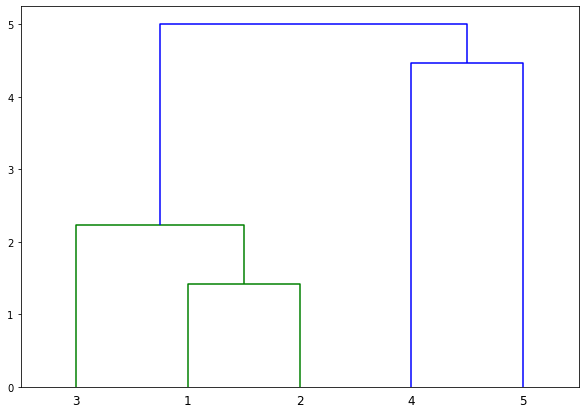

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
X = np.array([[1,2], [0,3], [-1,1], [0,-4], [4,-2]])
linked = linkage(X, 'single')
labelList = range(1, 6)
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
DATA = pd.read_csv("kmeans.csv", delimiter=',', index_col='Object')
coords = DATA.drop('Cluster', axis=1)
#Connecting the KMeans model from sklearn library
from sklearn.cluster import KMeans
#Initialization with centroids
kmeans = KMeans(n_clusters=3, init=np.array([[8.5, 8.75], [10.5, 7.13], [12.0, 5.0]]), max_iter=100, n_init=1)
#Model training
model = kmeans.fit(coords)
#Assigned clusters
model.labels_.tolist()

[0, 0, 2, 0, 1, 2, 2, 0, 2, 1, 1, 2, 2, 0, 2]

In [ ]:
DATA.head(5)

,X,Y,Cluster
Object,,,
1,2,13,0
2,5,6,1
3,17,7,2
4,5,10,1
5,12,6,2


In [ ]:
#Calculation of distances to centroids
alldistances = kmeans.fit_transform(coords)
#Distances from the centroids to all data points
alldistances

array([[ 3.73630834, 10.9188929 , 14.59661689],
       [ 6.02992537,  6.47216261,  8.49729849],
       [12.44829306,  5.67646212,  5.16068339],
       [ 2.0880613 ,  6.87184271, 10.3746158 ],
       [ 8.77268488,  1.49071198,  2.68404203],
       [14.7566934 ,  7.45355992,  4.87601376],
       [15.84171708,  8.49836586,  4.63570878],
       [ 3.28024389, 10.67187373, 14.54759956],
       [10.89770618,  3.72677996,  0.45175395],
       [ 6.70522185,  2.74873708,  6.5293685 ],
       [ 7.4404301 ,  1.88561808,  3.97183965],
       [10.09752445,  6.87184271,  6.34066886],
       [ 9.65194281,  3.34995854,  2.18529408],
       [ 8.93084542,  9.80929265, 13.42933129],
       [ 9.62081078,  4.92160769,  4.18208033]])

In [ ]:
s = 0
ss = 0
for i in range(14):
  if (model.labels_[i] == 0 ):
     s+= alldistances[i][0]
     ss += 1 
s/ss      

4.813076866197264

In [ ]:
#--select (AVG(MIP)- MIN(MIP))/(MAX(MIP)- MIN(MIP)) from pulsar_stars where (TARGET = 0 and MIP >= 91.9609375 and MIP <= 92.65625) or  (TARGET = 1 and MIP >= 47.4140625 and MIP <= 52.9296875)

In [ ]:
import pandas as pd
import numpy as np
#logistic regression
data =  pd.read_csv("report (1).csv", delimiter=',')
data.head(15)

,MIP,STDIP,EKIP,SIP,MC,STDC,EKC,SC,TARGET
0,67.664062,32.561787,2.028000,8.098344,8.266722,34.838902,4.793382,24.032048,1
1,65.226562,35.696904,2.291891,10.118479,15.515050,48.872426,3.185367,9.164036,1
2,69.210938,45.266166,2.024291,4.485091,2.546823,18.201225,9.997593,109.122306,1
3,65.796875,46.205106,2.289091,6.235283,20.372074,51.022074,2.941692,8.457182,1
4,69.210938,36.152380,2.602622,11.032994,11.813545,41.382661,3.902658,15.151920,1
5,94.765625,46.443596,0.703895,0.719807,2.153846,14.240637,10.837167,145.850546,0
6,94.757812,39.527235,0.785766,1.437366,2.275920,15.656293,9.990956,122.035398,0
7,95.031250,38.484562,0.387463,1.583800,2.834448,15.404610,7.857542,83.870055,0
8,94.781250,48.038061,0.444130,0.199481,0.498328,9.282765,22.753142,561.967854,0
9,68.101562,34.948364,2.107809,8.442368,5.709866,31.010710,5.862879,34.599675,1


In [ ]:
from sklearn import preprocessing
normalized = preprocessing.normalize(data, norm='max',axis=0)
normalized[0]

array([0.71009265, 0.45793166, 0.63493808, 0.50605331, 0.05136771,
       0.32428847, 0.19807652, 0.03796839, 1.        ])

In [ ]:
 from sklearn.preprocessing import MinMaxScaler
 scaler = MinMaxScaler()
 scaler.fit(data)
 print(scaler.data_max_)
 print(scaler.data_min_)
 
 print(scaler.transform(data))
 

[ 95.2890625   71.10621457   3.19401183  16.00294689 160.9322742
 107.4318232   24.19964651 632.948879     1.        ]
[65.078125   30.23704769  0.08535154 -0.45223887  0.43478261  8.86973326
 -1.15513947 -1.62340451  0.        ]
[[0.08559607 0.05688247 0.62491492 ... 0.23461138 0.04042952 1.        ]
 [0.00491337 0.13359354 0.70980389 ... 0.1711908  0.01699954 1.        ]
 [0.13679855 0.36773734 0.62372183 ... 0.43986695 0.17452025 1.        ]
 ...
 [0.00413757 0.07161705 0.89288912 ... 0.09957792 0.00305748 1.        ]
 [0.97957073 0.37290461 0.11274787 ... 0.65585022 0.40763781 0.        ]
 [0.98293251 0.18306549 0.14583936 ... 0.58986071 0.40097295 0.        ]]


In [ ]:

from sklearn.linear_model import LogisticRegression

X = normalized[:, [0,1,2,3,4,5,6,7]]
y = normalized[:, 8]
#X = pd.DataFrame(normalized.(['TARGET'], axis=1))
#Selecting the response column
#y = pd.DataFrame(normalized['TARGET'])
reg = LogisticRegression(random_state=2019, solver='lbfgs').fit(X, y)
reg.predict_proba([[0.254, 0.19, 0.939, 0.624, 0.935, 0.875, 0.151, 0.312]])

array([[0.00179315, 0.99820685]])

In [ ]:
#right solution , minmax scaler
xn = scaler.transform(data)
X = xn[:, [0,1,2,3,4,5,6,7]]
y = xn[:, 8]
#X = pd.DataFrame(normalized.(['TARGET'], axis=1))
#Selecting the response column
#y = pd.DataFrame(normalized['TARGET'])
reg = LogisticRegression(random_state=2019, solver='lbfgs').fit(X, y)
reg.predict_proba([[0.254, 0.19, 0.939, 0.624, 0.935, 0.875, 0.151, 0.312]])

array([[0.01979559, 0.98020441]])

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
Y = [[0.254, 0.19, 0.939, 0.624, 0.935, 0.875, 0.151, 0.312]]
clc = euclidean_distances(X, Y)
min(clc)    

array([0.60717192])

In [ ]:
from sklearn.cluster import KMeans
#Initialization with centroids
kmeans = KMeans(n_clusters=5)
model = kmeans.fit(X)
#Assigned clusters
model.labels_.tolist()
model.predict(Y)

array([0], dtype=int32)